<a id='table_of_contents'></a>

0. [Import libraries](#imports)
1. [Import data](#import_data)
2. [Data exploration](#data_exploration)
3. [Benchmark model](#benchmark_model)<br>
    3.1 [Decision Tree Classifier](#decission_tree)<br>
4. [Model training](#model_training)<br>
    4.1. [Logistic Regression](#logistic_regression)<br>
    4.2. [Random Forest Classifier](#random_forest)<br>
    4.3. [Comparing Algorithm Performance](#comparing_algorithm_performances)



## 0. Import libraries <a id='imports'></a>
[back to top](#table_of_contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Import data <a id='import_data'></a>
[back to top](#table_of_contents)

In [4]:
df = pd.read_csv("C:/Users/Justyna/Downloads/Healthcare-Diabetes.csv")

## 2 Data exploration <a id='exploration'></a>
[back to top](#table_of_contents)

In [78]:
df.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [79]:
df.shape

(2768, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


In [9]:
print(df['Outcome'])

0       1
1       0
2       1
3       0
4       1
       ..
2763    0
2764    1
2765    0
2766    1
2767    0
Name: Outcome, Length: 2768, dtype: int64


In [10]:
df.iloc[:, 9]

0       1
1       0
2       1
3       0
4       1
       ..
2763    0
2764    1
2765    0
2766    1
2767    0
Name: Outcome, Length: 2768, dtype: int64

In [11]:
x = df.drop('Outcome', axis=1)
y = df['Outcome']

##### X is used for training data. Y is used for testing data.

In [15]:
df['Outcome'].value_counts()

0    1816
1     952
Name: Outcome, dtype: int64

<Axes: >

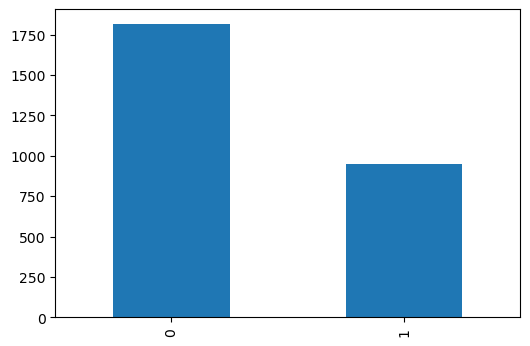

In [19]:
df['Outcome'].value_counts().plot(kind='bar', figsize=(6,4))

<Axes: xlabel='Outcome', ylabel='count'>

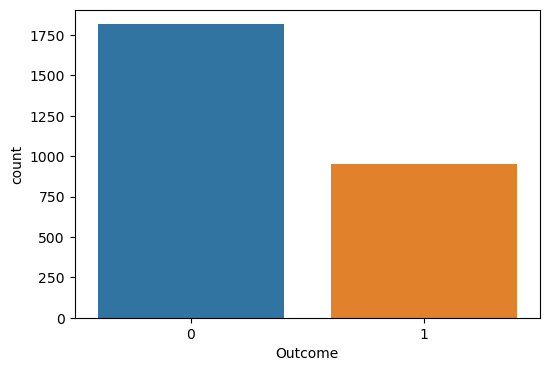

In [21]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Outcome')

In [22]:
df.isnull().sum()

Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

array([[<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>],
       [<Axes: title={'center': 'BloodPressure'}>,
        <Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>],
       [<Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Outcome'}>, <Axes: >, <Axes: >]],
      dtype=object)

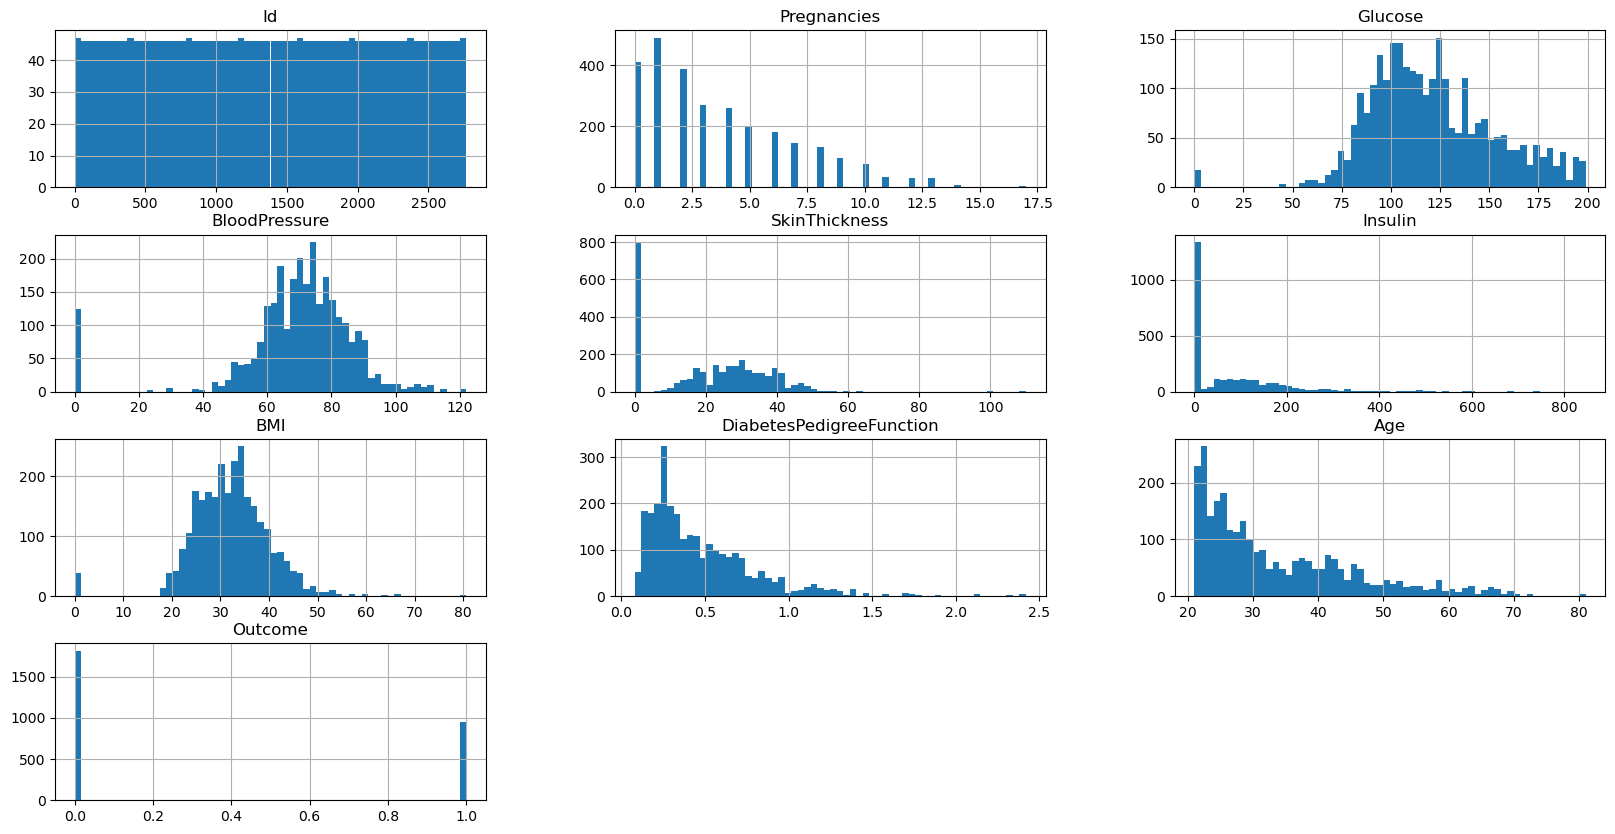

In [23]:
df.hist(figsize=(20,10), bins=60)

In [27]:
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n")
    print('------------------')
    
    
for col in num_cols:
    target_summary_with_num(df, "Outcome", col)

                  Id
Outcome             
0        1388.143722
1        1377.549370

------------------
         Pregnancies
Outcome             
0           3.204295
1           4.769958

------------------
            Glucose
Outcome            
0        110.419604
1        141.481092

------------------
         BloodPressure
Outcome               
0            68.119493
1            71.070378

------------------
         SkinThickness
Outcome               
0            19.945485
1            22.501050

------------------
           Insulin
Outcome           
0        70.075991
1        99.302521

------------------
               BMI
Outcome           
0        30.494989
1        35.270378

------------------
         DiabetesPedigreeFunction
Outcome                          
0                        0.433316
1                        0.543445

------------------
               Age
Outcome           
0        31.111233
1        36.987395

------------------


<Axes: xlabel='Outcome', ylabel='Age'>

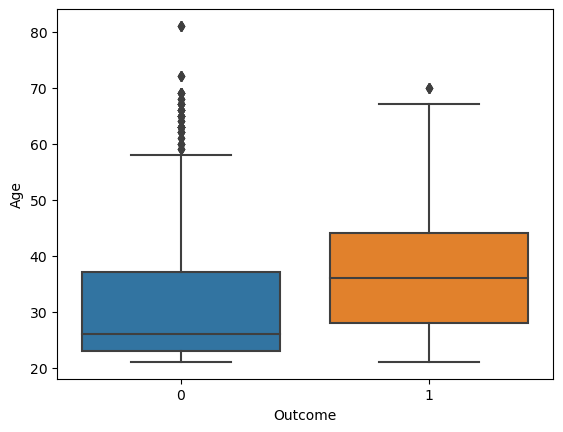

In [30]:
plt.figure(dpi=100)
sns.boxplot(data=df, x='Outcome', y='Age')

In [31]:
duplicates = df.duplicated()
print(duplicates)

0       False
1       False
2       False
3       False
4       False
        ...  
2763    False
2764    False
2765    False
2766    False
2767    False
Length: 2768, dtype: bool


#### There are no null values and duplicates.

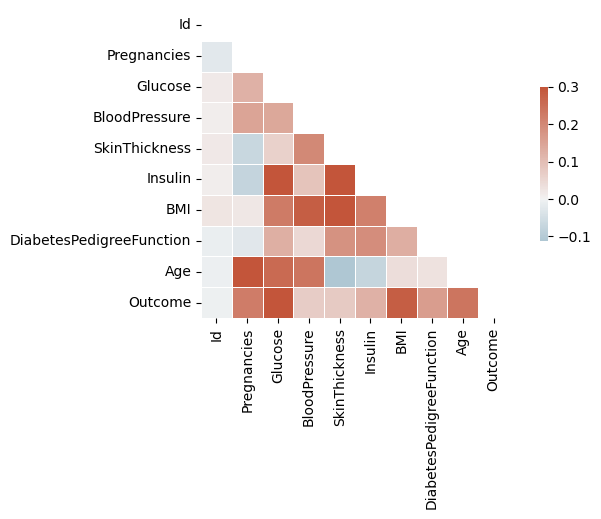

In [33]:
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 4))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

#### There is a lot of positive correlation which is shown by the orange trends in the heatmap.

In [34]:
corr

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Id,1.000000,-0.024222,0.015010,0.009717,0.017702,0.007359,0.024007,-0.009695,-0.007404,-0.006298
Pregnancies,-0.024222,1.000000,0.122839,0.147253,-0.068673,-0.075734,0.018761,-0.027731,0.540805,0.223796
Glucose,0.015010,0.122839,1.000000,0.142095,0.061023,0.323445,0.225308,0.127195,0.256958,0.460644
BloodPressure,0.009717,0.147253,0.142095,1.000000,0.201167,0.087823,0.281560,0.048471,0.238684,0.072900
SkinThickness,0.017702,-0.068673,0.061023,0.201167,1.000000,0.445345,0.393494,0.179830,-0.111895,0.075603
Insulin,0.007359,-0.075734,0.323445,0.087823,0.445345,1.000000,0.215926,0.190500,-0.073458,0.123646
BMI,0.024007,0.018761,0.225308,0.281560,0.393494,0.215926,1.000000,0.129766,0.038175,0.280928
DiabetesPedigreeFunction,-0.009695,-0.027731,0.127195,0.048471,0.179830,0.190500,0.129766,1.000000,0.028544,0.160664
Age,-0.007404,0.540805,0.256958,0.238684,-0.111895,-0.073458,0.038175,0.028544,1.000000,0.237050
Outcome,-0.006298,0.223796,0.460644,0.072900,0.075603,0.123646,0.280928,0.160664,0.237050,1.000000


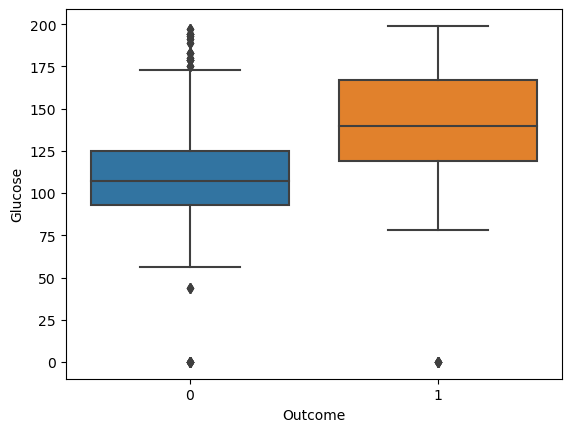

In [35]:
plt.figure(dpi=100)
sns.boxplot(data=df, x='Outcome',y='Glucose')
plt.show()

#### From the boxplot we can see that patients who are diabetic (1) have higher glucose levels than the patients who do not have diabetes (0). We can include glucose levels in our model. 

## 3 Benchmark Model <a id='benchmark'></a>

In [60]:
diabetes_benchmark = df.copy()

In [61]:
diabetes_benchmark.columns

Index(['Id', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [62]:
features = ['Pregnancies','Glucose', 'BloodPressure','SkinThickness','Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

In [63]:
target_feature = 'Outcome'

### 3.1 Decision Tree Classifier <a id='decisionTree'></a>

In [69]:
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Separate features and target variable
x_bench = diabetes_benchmark[features]
y_bench = diabetes_benchmark[target_feature]

# one-hot encode
x_bench = pd.get_dummies(x_bench)
x_train_b, x_test_b, y_train_b, y_test_b = train_test_split(x_bench, y_bench, test_size=0.33, random_state=42)

# Train the model
tree = DecisionTreeClassifier(max_depth=10, random_state=42)
tree.fit(x_train_b, y_train_b)

# Make predictions
y_pred_b = tree.predict(x_test_b)

# Evaluate the model
print('Confusion Matrix:\n', confusion_matrix(y_test_b, y_pred_b))
print('\nClassification Report:\n', classification_report(y_test_b, y_pred_b))
print('Accuracy Score:', accuracy_score(y_test_b, y_pred_b))


Confusion Matrix:
 [[585  31]
 [ 46 252]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94       616
           1       0.89      0.85      0.87       298

    accuracy                           0.92       914
   macro avg       0.91      0.90      0.90       914
weighted avg       0.92      0.92      0.92       914

Accuracy Score: 0.9157549234135668


#### The confusion matrix shows that the majority of the predictions fall into the true positive and true negative categories. This means that the model is predicting the presence or absence of diabetes for most cases. 

#### The overall accuracy of the model is 91.6 % which is quite high. 

## 4 Model Training <a id='models'></a>

### 4.1 Logistic Regression <a id='LogisticReg'></a>

In [72]:
from sklearn.linear_model import LogisticRegression
# separate features and the target feature
x_bench = diabetes_benchmark[features]
y_bench = diabetes_benchmark[target_feature]


x_train_b, x_test_b, y_train_b, y_test_b = train_test_split(x_bench, y_bench, test_size=0.33, random_state=42)

#Train the model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(x_train_b, y_train_b)

#make predictions
y_pred_b = model.predict(x_test_b)

#evaluate the model
print('Confusion Matrix: \n', confusion_matrix(y_test_b, y_pred_b))
print('\n Classification Report: \n', classification_report(y_test_b, y_pred_b))
print('Accuracy Score:', accuracy_score(y_test_b, y_pred_b))

Confusion Matrix: 
 [[555  61]
 [135 163]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.90      0.85       616
           1       0.73      0.55      0.62       298

    accuracy                           0.79       914
   macro avg       0.77      0.72      0.74       914
weighted avg       0.78      0.79      0.78       914

Accuracy Score: 0.7855579868708972


###  4.2  Random Forest Classifier <a id='randomForest'></a>

In [73]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Separate features and the target feature
X = diabetes_benchmark[features]
y = diabetes_benchmark[target_feature]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Train the model
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))
print('Accuracy Score:', accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[601  15]
 [  8 290]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       616
           1       0.95      0.97      0.96       298

    accuracy                           0.97       914
   macro avg       0.97      0.97      0.97       914
weighted avg       0.98      0.97      0.97       914

Accuracy Score: 0.9748358862144421


###  4.3  Comparing Algorithm Performances <a id = 'algo_performances'></a>

| Metrics / Models | DecisionTree Classifier (%)| Logistic Regression (%)| RandomForest Classifier(%)|
|------------------|----------------|----------------|----------------|
| Accuracy         | 91.57          | 78.55          | 97.48          |
|                  |                |                |                |
| **Class 0**      |                |                |                |
| Precision        | 93             | 80             | 99             |
| Recall           | 95             | 90             | 98             |
| F1-score         | 94             | 85             | 98             |
|                  |                |                |                |
| **Class 1**      |                |                |                |
| Precision        | 89             | 73             | 95             |
| Recall           | 85             | 55             | 97             |
| F1-score         | 87             | 62             | 96             |
